![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

# Data Loading

In [8]:
# Import necessary packages
import pandas as pd
import numpy as np

# Begin coding here ...
# Use as many cells as you like
data1 = df = pd.read_csv(r'D:\Data Engineering\EDA-Project-Airbnb-Market-Trends-main\data\airbnb_price.csv')
data2 = df = pd.read_excel(r'D:\Data Engineering\EDA-Project-Airbnb-Market-Trends-main\data\airbnb_room_type.xlsx')
data3 = df = pd.read_table(r'D:\Data Engineering\EDA-Project-Airbnb-Market-Trends-main\data\airbnb_last_review.tsv')
data1.head()
data2.head()
data3.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [9]:
# Step 2: Merge the datasets on 'listing_id'
merged_df = pd.merge(data1, data2, on="listing_id")
merged_df = pd.merge(merged_df, data3, on="listing_id")

In [10]:
# Step 3: Save the combined dataset to a CSV file (optional)
merged_df.to_csv("data/airbnb_combined_data.csv", index=False)

# Step 4: Explore the combined dataset
print("Combined Dataset Overview:")
print(merged_df.info())
print("\nFirst Few Rows of the Combined Dataset:")
print(merged_df.head())

Combined Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None

First Few Rows of the Combined Dataset:
   listing_id        price                nbhood_full  \
0        2595  225 dollars         Manhattan, Midtown   
1        3831   89 dollars     Brooklyn, Clinton Hill   
2        5099  200 dollars     Manhattan, Murray Hill   
3        5178   79 dollars  Manhattan, Hell's Kitchen   
4        5238  150 dollars       Manhattan, Chinatown   

                                 description        room_

In [11]:
data = pd.read_csv("data/airbnb_combined_data.csv")

data.columns



Index(['listing_id', 'price', 'nbhood_full', 'description', 'room_type',
       'host_name', 'last_review'],
      dtype='object')

# Data Transformation

In [12]:
# Check for missing values
print("\nMissing Values")
print(data.isnull().sum())


Missing Values
listing_id      0
price           0
nbhood_full     0
description    10
room_type       0
host_name       8
last_review     0
dtype: int64


In [13]:
# Descriptive statistics
print("\nDescriptive Statistics")
print(data.describe())


Descriptive Statistics
         listing_id
count  2.520900e+04
mean   2.068922e+07
std    1.102928e+07
min    2.595000e+03
25%    1.202273e+07
50%    2.234391e+07
75%    3.037669e+07
max    3.645581e+07


# Data Visualization

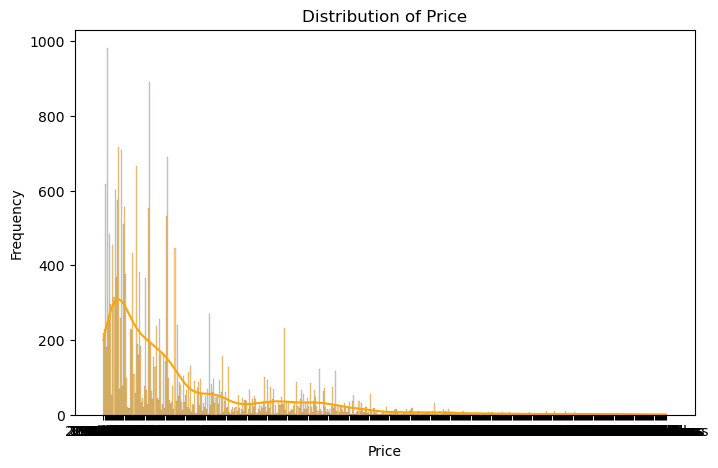

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Distribution of Price
if 'price' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data['price'], kde=True, bins=30, color='orange')
    plt.title('Distribution of Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5380\427968784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nbhood_full', y='price', data=data, palette='coolwarm')


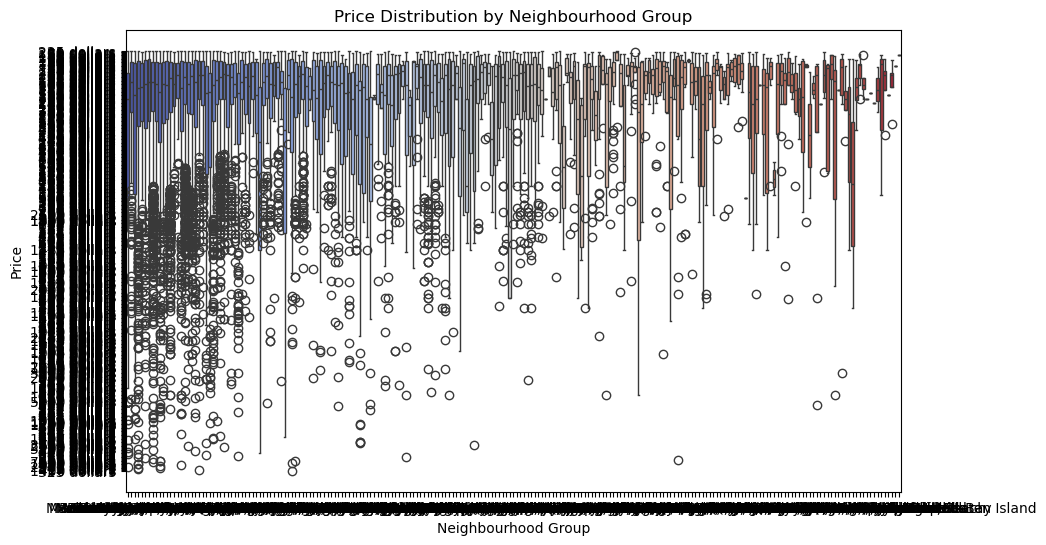

In [15]:
# Box Plot: Price by Neighbourhood Group (if available)
if 'price' in data.columns and 'nbhood_full' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='nbhood_full', y='price', data=data, palette='coolwarm')
    plt.title('Price Distribution by Neighbourhood Group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Price')
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5380\1661292145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=data, palette='muted')


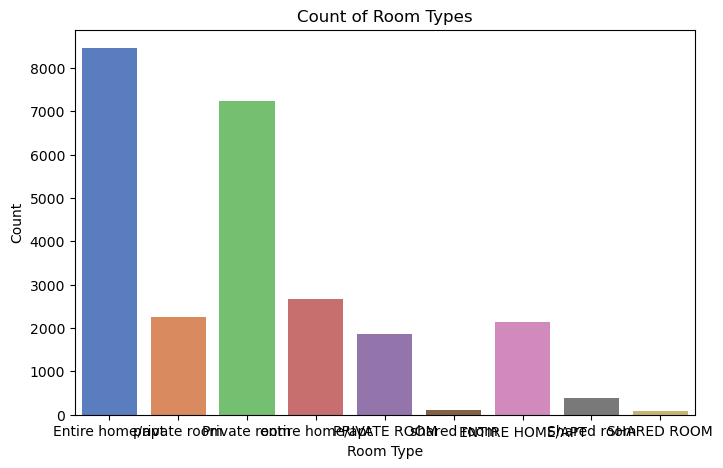

In [16]:
# Count Plot: Distribution of Room Types
if 'room_type' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='room_type', data=data, palette='muted')
    plt.title('Count of Room Types')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.show()

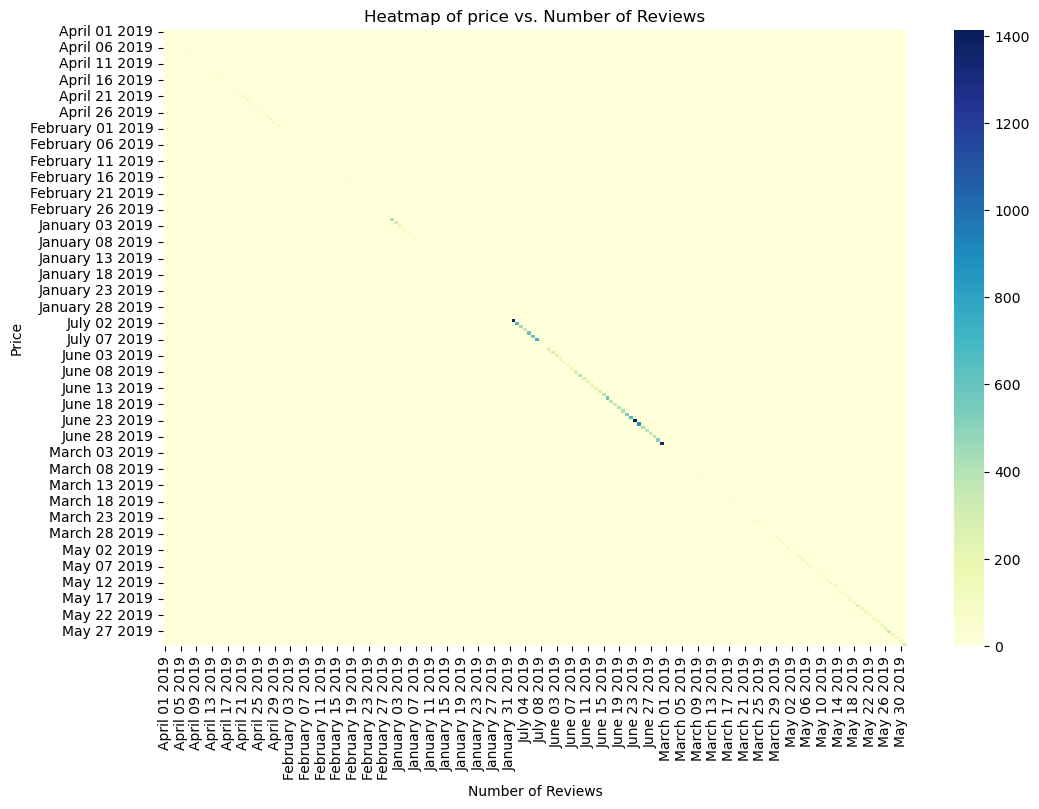

In [17]:
# Heatmap: Availability vs. Number of Reviews
if 'price' in data.columns and 'last_review' in data.columns:
    heatmap_data = data.pivot_table(index='last_review', columns='last_review', aggfunc='size', fill_value=0)
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=True)
    plt.title('Heatmap of price vs. Number of Reviews')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Price')
    plt.show()


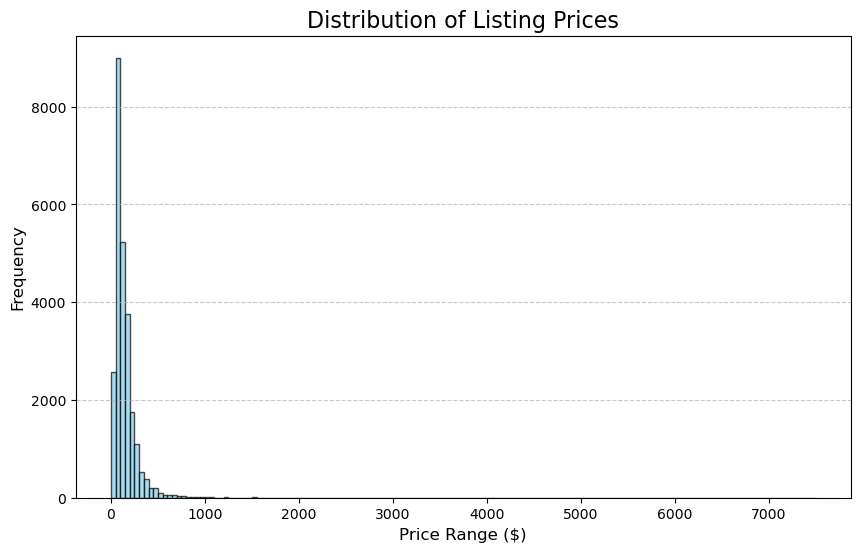

In [ ]:

## Histogram
# the files into DataFrames
price_data = pd.read_csv(file1_path)
room_type_data = pd.read_excel(file2_path)
last_review_data = pd.read_table(file3_path)

# Extract and clean the price column
price_column = price_data['price']  
cleaned_prices = price_column.str.extract(r'(\d+)').astype(float)[0]
cleaned_prices = cleaned_prices.dropna()  

# the bin edges in increments of $50
min_price = int(cleaned_prices.min())
max_price = int(cleaned_prices.max())
bins = np.arange(min_price, max_price + 50, 50)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(cleaned_prices, bins=bins, edgecolor='black', color='skyblue', alpha=0.7)
plt.title("Distribution of Listing Prices", fontsize=16)
plt.xlabel("Price Range ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_5380\3449477034.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


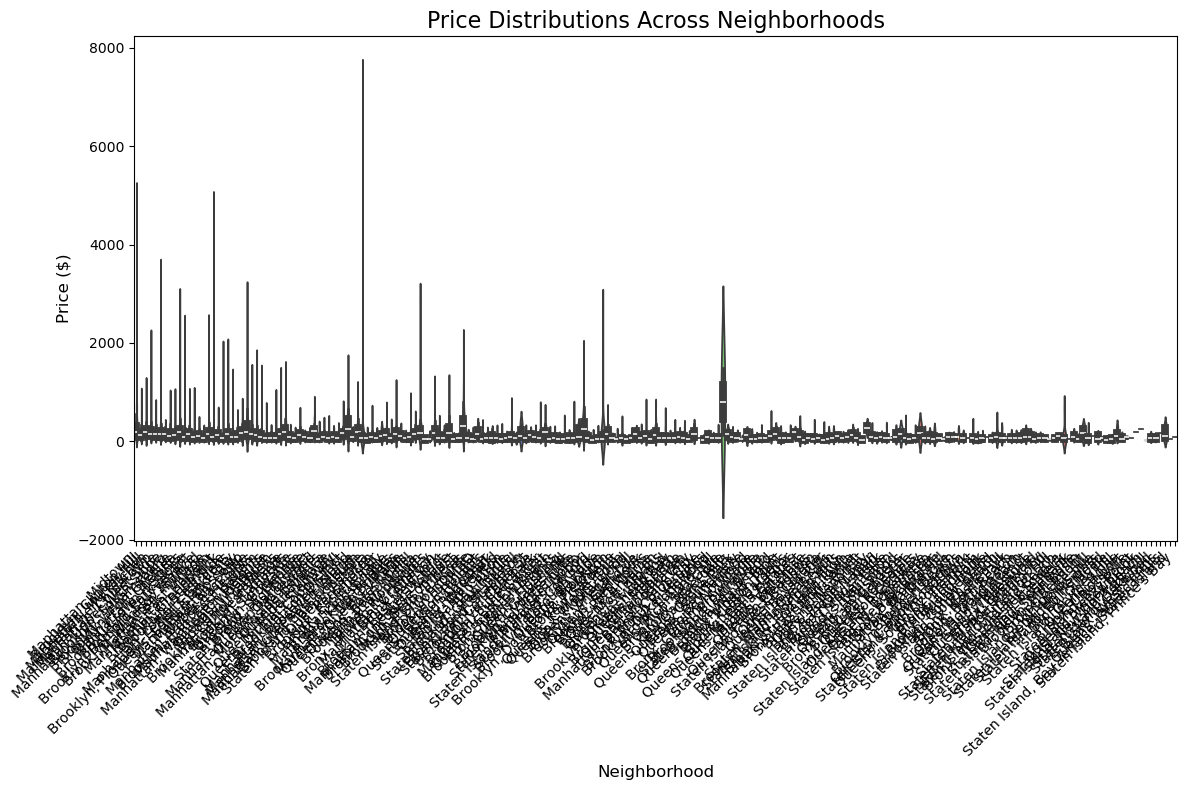

In [22]:

# Violin Plot
file_path = r'D:\Data Engineering\EDA-Project-Airbnb-Market-Trends-main\data\airbnb_price.csv'
combined_data = pd.read_csv(file_path)
combined_data['price_cleaned'] = combined_data['price'].str.extract(r'(\d+)').astype(float)
combined_data = combined_data.dropna(subset=['price_cleaned', 'nbhood_full'])
# Plot a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=combined_data,
    x='nbhood_full',  
    y='price_cleaned',  
    palette='muted'
)
# Customize the plot
plt.title('Price Distributions Across Neighborhoods', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
